In [1]:
import rrlyrae
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

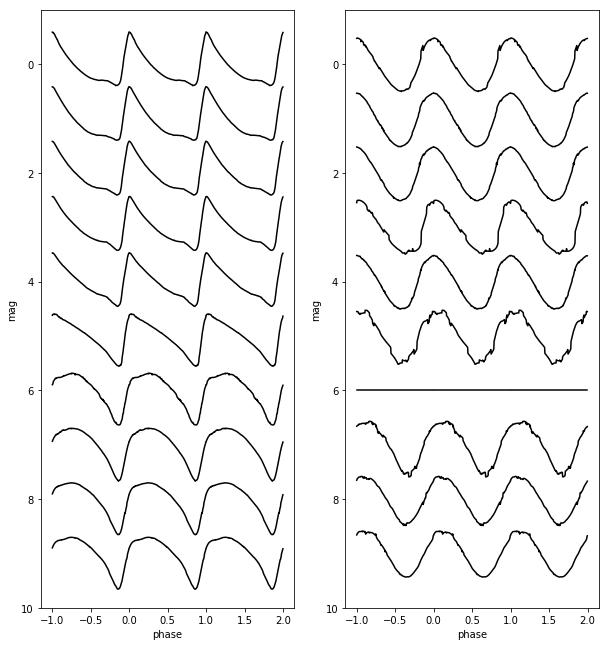

In [2]:
# Plot the template light curve in each band 

bands = np.array(['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', '[3.6]', '[4.5]'])
fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(121)
ax.set_xlabel('phase')
ax.set_ylabel('mag')
ax.set_ylim(10,-1)
for ii, band in enumerate(bands):
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii))
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=-1.0)
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=1.0)
    
ax = fig.add_subplot(122)
ax.set_xlabel('phase')
ax.set_ylabel('mag')
ax.set_ylim(10,-1)
for ii, band in enumerate(bands):
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), mode='c')
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=-1.0, mode='c')
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=1.0, mode='c')

[5554.16149192 5556.93887025 5556.2572191  5557.41780412 5557.72286221
 5550.83357482 5551.61389138]


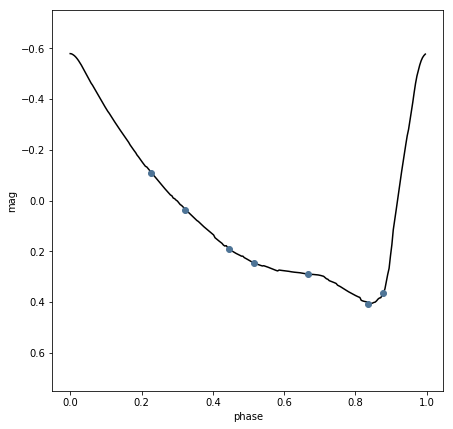

In [4]:
# Test the function that determines the potential phase coverage for given observation times 

times = np.random.uniform(low=5550.0, high=5560.0, size=7)
print times
rrlyrae.simulate_observing_cadence(times, amplitude=1.0, mode='ab')